In [1]:
using Plots, LaTeXStrings, LinearAlgebra, Statistics

In [73]:
mu = 0.0325

@inline function U(x, y, mu)
    r1 = sqrt((x + mu)^2 + y^2)
    r2 = sqrt((x - (1 - mu))^2 + y^2)
    return -(1 - mu) / r1 - mu / r2 -0.5(x^2 + y^2)
end

x = LinRange(-2, 2, 300)
y = LinRange(-2, 2, 300)

U_values = [U(xi, yi, mu) for yi in y, xi in x]

300×300 Matrix{Float64}:
 -4.35394  -4.32845  -4.30315  -4.27803  …  -4.30294  -4.32824  -4.35373
 -4.32846  -4.30299  -4.2777   -4.2526      -4.27749  -4.30278  -4.32826
 -4.30317  -4.27771  -4.25244  -4.22734     -4.25222  -4.27751  -4.30297
 -4.27807  -4.25262  -4.22736  -4.20227     -4.22714  -4.25242  -4.27787
 -4.25314  -4.22771  -4.20246  -4.17739     -4.20225  -4.22751  -4.25295
 -4.2284   -4.20298  -4.17774  -4.15269  …  -4.17753  -4.20278  -4.22821
 -4.20384  -4.17843  -4.15321  -4.12817     -4.153    -4.17824  -4.20365
 -4.17947  -4.15407  -4.12886  -4.10383     -4.12865  -4.15388  -4.17928
 -4.15527  -4.12989  -4.10469  -4.07968     -4.10449  -4.1297   -4.15509
 -4.13126  -4.10589  -4.08071  -4.0557      -4.08051  -4.1057   -4.13108
  ⋮                                      ⋱                      
 -4.15527  -4.12989  -4.10469  -4.07968     -4.10449  -4.1297   -4.15509
 -4.17947  -4.15407  -4.12886  -4.10383     -4.12865  -4.15388  -4.17928
 -4.20384  -4.17843  -4.15321  -4.

In [74]:
println(minimum(U_values))
println(maximum(U_values))

-143.25262917483388
-1.484281633150916


In [75]:
percentiles = [0, 1, 5, 10, 25, 50, 75, 90, 95, 99, 100]
values = quantile(vec(U_values), percentiles ./ 100)

for (p, v) in zip(percentiles, values)
    println("$p: $v")
end

0: -143.25262917483388
1: -4.351624066074551
5: -3.47303786150912
10: -3.0768725304048394
25: -2.5057653654756384
50: -2.0163367828296135
75: -1.6557924285166248
90: -1.5319767469125891
95: -1.5106007208653585
99: -1.490083404015718
100: -1.484281633150916


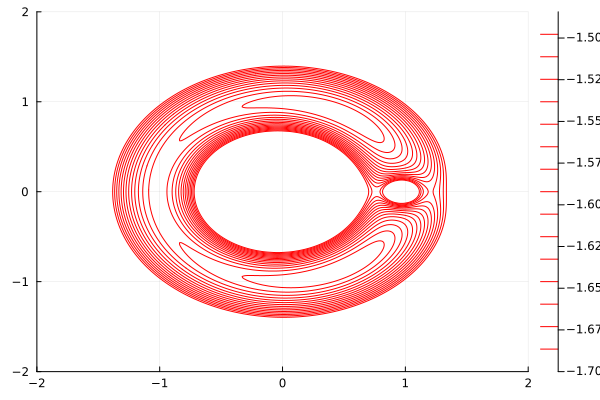

In [76]:
U_clipped = clamp.(U_values, -1.7, -1.4)
contour(x, y, U_clipped, color=:red)

In [77]:
U_clipped

300×300 Matrix{Float64}:
 -1.7  -1.7  -1.7  -1.7  -1.7  -1.7  …  -1.7  -1.7  -1.7  -1.7  -1.7  -1.7
 -1.7  -1.7  -1.7  -1.7  -1.7  -1.7     -1.7  -1.7  -1.7  -1.7  -1.7  -1.7
 -1.7  -1.7  -1.7  -1.7  -1.7  -1.7     -1.7  -1.7  -1.7  -1.7  -1.7  -1.7
 -1.7  -1.7  -1.7  -1.7  -1.7  -1.7     -1.7  -1.7  -1.7  -1.7  -1.7  -1.7
 -1.7  -1.7  -1.7  -1.7  -1.7  -1.7     -1.7  -1.7  -1.7  -1.7  -1.7  -1.7
 -1.7  -1.7  -1.7  -1.7  -1.7  -1.7  …  -1.7  -1.7  -1.7  -1.7  -1.7  -1.7
 -1.7  -1.7  -1.7  -1.7  -1.7  -1.7     -1.7  -1.7  -1.7  -1.7  -1.7  -1.7
 -1.7  -1.7  -1.7  -1.7  -1.7  -1.7     -1.7  -1.7  -1.7  -1.7  -1.7  -1.7
 -1.7  -1.7  -1.7  -1.7  -1.7  -1.7     -1.7  -1.7  -1.7  -1.7  -1.7  -1.7
 -1.7  -1.7  -1.7  -1.7  -1.7  -1.7     -1.7  -1.7  -1.7  -1.7  -1.7  -1.7
  ⋮                             ⋮    ⋱         ⋮                      
 -1.7  -1.7  -1.7  -1.7  -1.7  -1.7     -1.7  -1.7  -1.7  -1.7  -1.7  -1.7
 -1.7  -1.7  -1.7  -1.7  -1.7  -1.7     -1.7  -1.7  -1.7  -1.7  -1.7  -1.7
 -1.